# CIFAR-10 Handwritten Digit Recognition with DNN

Author: [1chooo](https://1chooo.com)

### Import the package and the dataset

In [4]:
import tensorflow as tf
import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

2024-09-23 17:54:39.790848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define the DNN model architecture

In [5]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    return model

### Visualize the data type and the label!

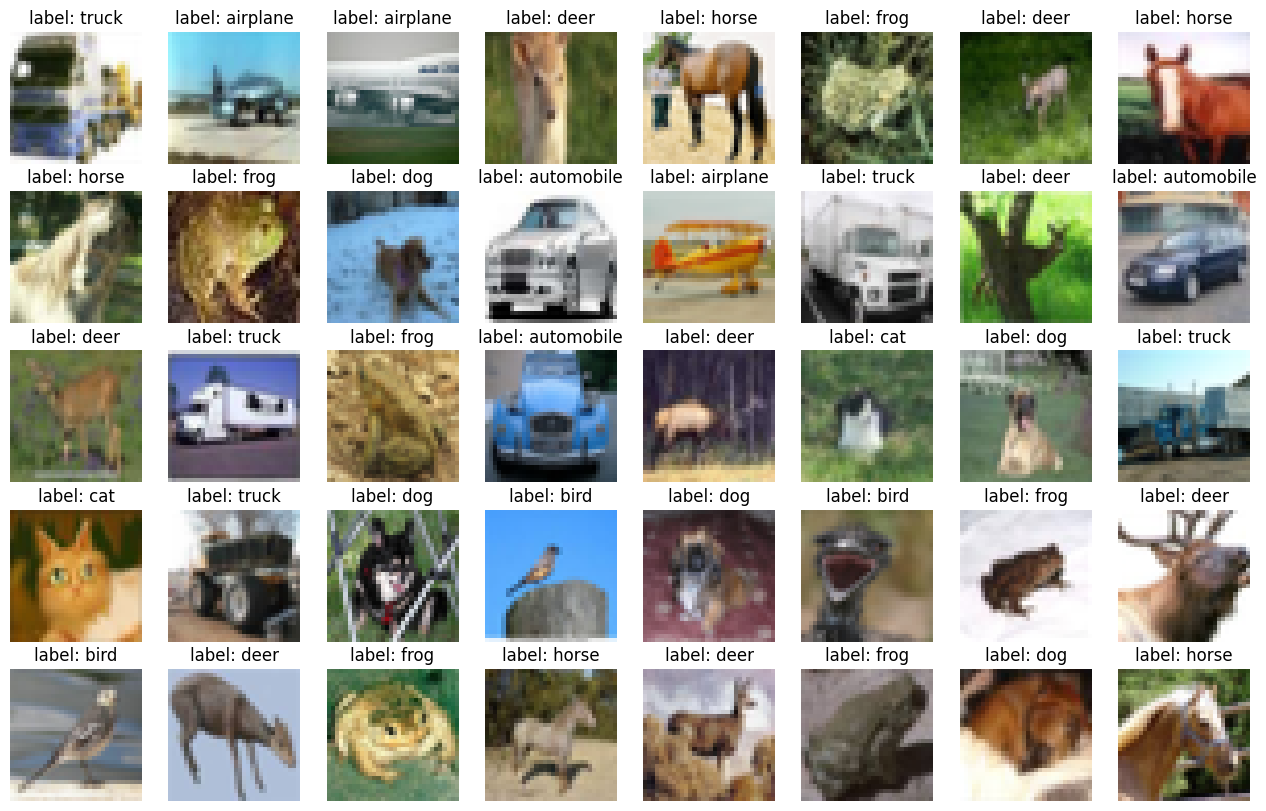

In [6]:
import matplotlib.pyplot as plt
from random import randrange

text = [
	'airplane', 
	'automobile',
	'bird' ,
	'cat', 
	'deer', 
	'dog', 
	'frog', 
	'horse', 
	'ship', 
	'truck'
]

plt.figure(figsize=(16, 10), facecolor='w')

for i in range(5):
	for j in range(8):
		index = randrange(0, 50000)
		plt.subplot(5, 8, i * 8 + j + 1)
		plt.title("label: {}".format(text[train_labels[index][0]]))
		plt.imshow(train_images[index])
		plt.axis('off')

plt.show()

In [7]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(test_images, test_labels)
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2684 - loss: 1.9876 - val_accuracy: 0.3481 - val_loss: 1.8010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3666 - loss: 1.7552 - val_accuracy: 0.3957 - val_loss: 1.6701
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3888 - loss: 1.6880 - val_accuracy: 0.3739 - val_loss: 1.7313
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4028 - loss: 1.6512 - val_accuracy: 0.4151 - val_loss: 1.6357
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4177 - loss: 1.6111 - val_accuracy: 0.4095 - val_loss: 1.6416
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4244 - loss: 1.5888 - val_accuracy: 0.4213 - val_loss: 1.6341
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4289 - loss: 1.5870 - val_accuracy: 0.4273 - val_loss: 1.5849
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4355 - loss: 1.5622 - 

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
def plot_training_history(history) -> None:
    (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), facecolor='w')  # Create 2 subplots

    # First plot for accuracy
    ax1.plot(history.history["accuracy"], label="train accuracy")
    ax1.plot(history.history["val_accuracy"], label="test accuracy")
    ax1.set_title("Model Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.legend(loc="upper left")

    # Second plot for loss
    ax2.plot(history.history["loss"], label="train loss")
    ax2.plot(history.history["val_loss"], label="test loss")
    ax2.set_title("Model Loss")
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Epoch")
    ax2.legend(loc="upper left")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


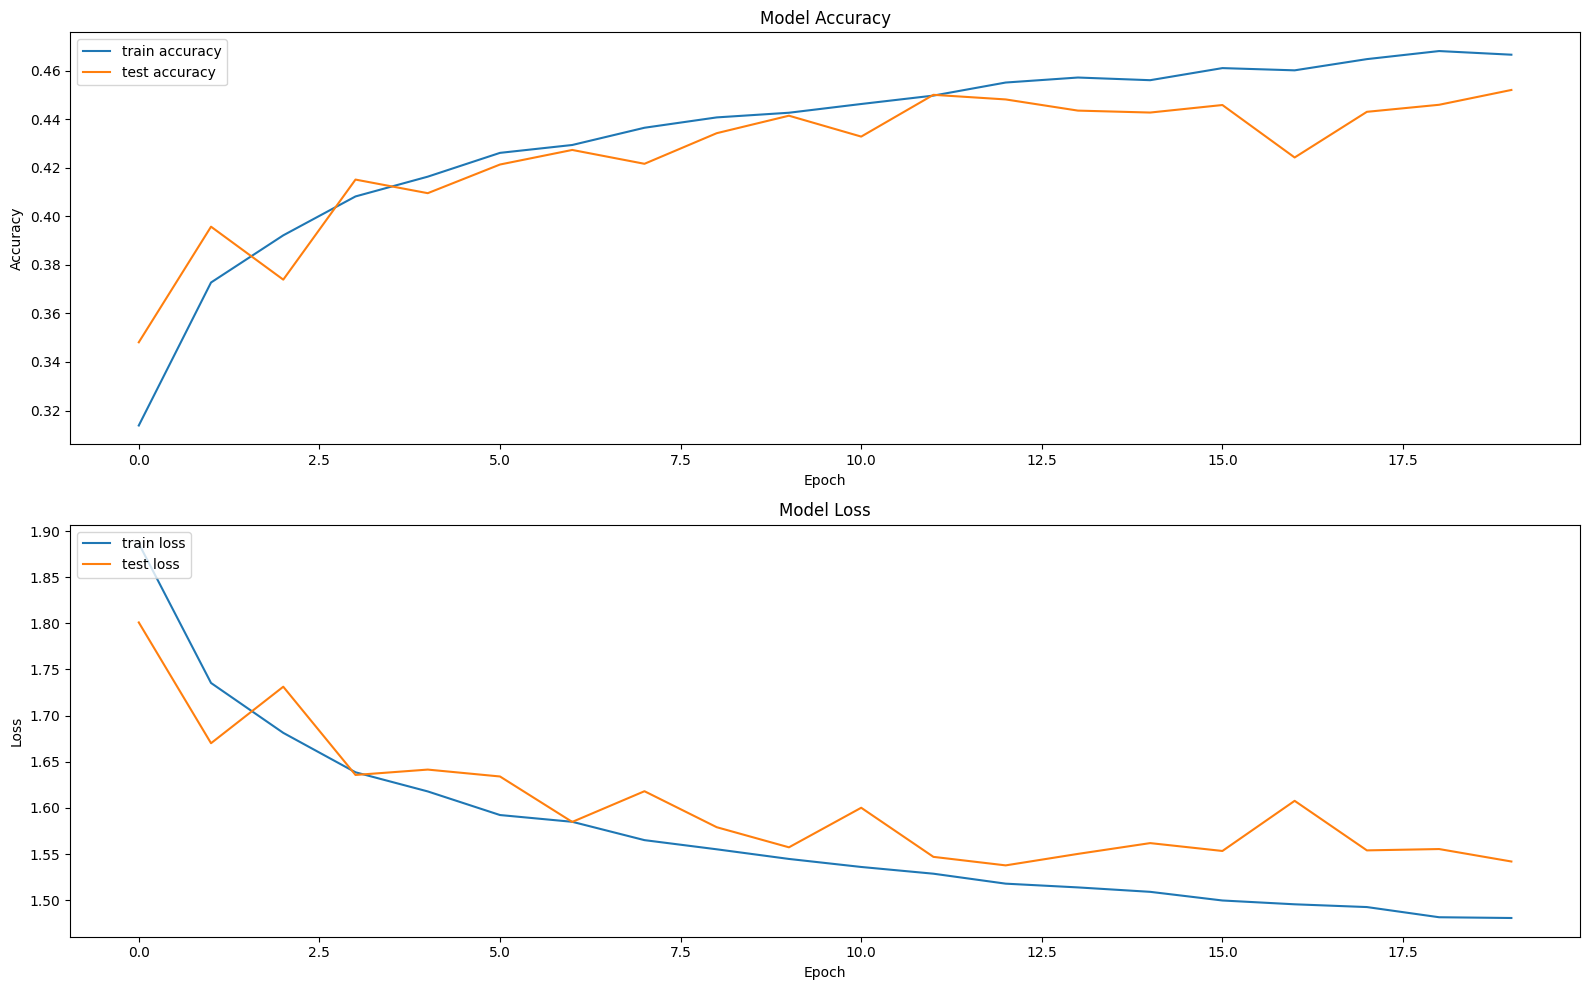

In [12]:
plot_training_history(history)

We find that about seven times, we can get the lowest `val_loss`, then we can re-compile our model again, and set the `epoches` to 14.

In [33]:
def show_test_accuracy(test_acc: float) -> None:
	print('Test accuracy:', test_acc)

In [13]:
show_test_accuracy(test_acc)

Test accuracy: 0.4519999921321869


In [14]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2646 - loss: 1.9875 - val_accuracy: 0.3629 - val_loss: 1.7529
Epoch 2/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3544 - loss: 1.7865 - val_accuracy: 0.3692 - val_loss: 1.7474
Epoch 3/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3683 - loss: 1.7480 - val_accuracy: 0.3823 - val_loss: 1.6974
Epoch 4/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3754 - loss: 1.7211 - val_accuracy: 0.3813 - val_loss: 1.7016
Epoch 5/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3843 - loss: 1.7010 - val_accuracy: 0.3857 - val_loss: 1.6721
Epoch 6/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3861 - loss: 1.6952 - val_accuracy: 0.3844 - val_loss: 1.6904
Epoch 7/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3910 - loss: 1.6764 - val_accuracy: 0.3922 - val_loss: 1.6727
Epoch 8/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3983 - loss: 1.6729 - 

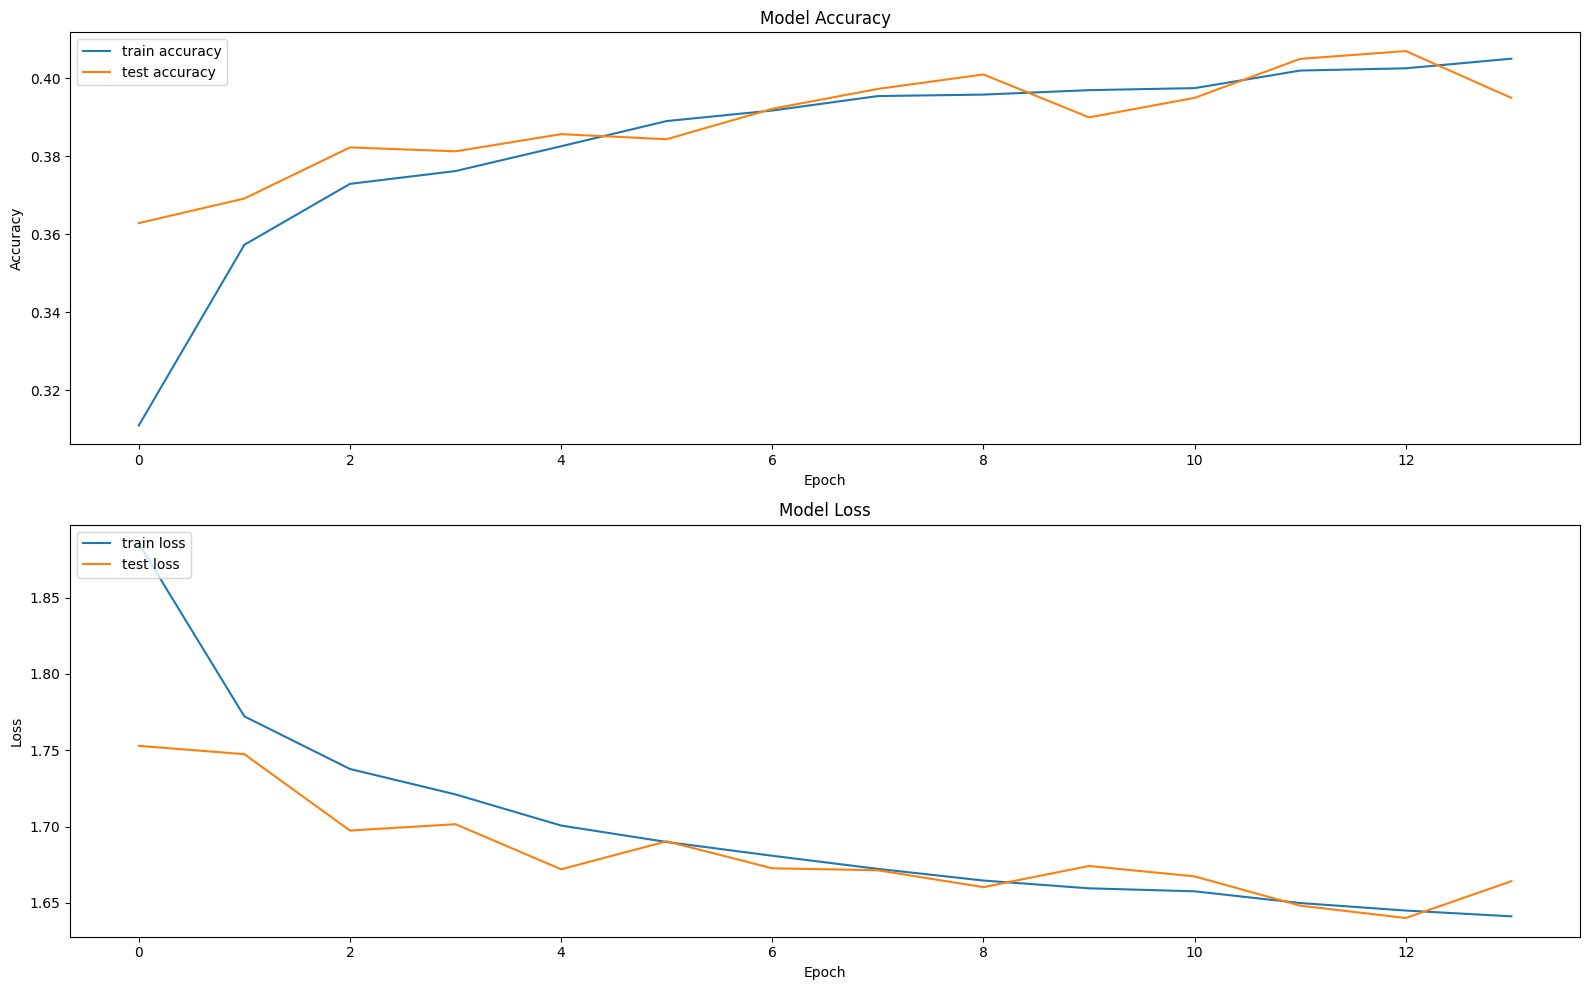

In [15]:
plot_training_history(history)

In [16]:
show_test_accuracy(test_acc)

Test accuracy: 0.39500001072883606


The result of the test not change not much. And we set `epoches` to 7.

In [17]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=7, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2616 - loss: 1.9942 - val_accuracy: 0.3745 - val_loss: 1.7363
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3771 - loss: 1.7441 - val_accuracy: 0.3978 - val_loss: 1.6750
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3902 - loss: 1.6935 - val_accuracy: 0.4019 - val_loss: 1.6622
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4062 - loss: 1.6546 - val_accuracy: 0.4199 - val_loss: 1.6132
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4142 - loss: 1.6328 - val_accuracy: 0.4201 - val_loss: 1.6127
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4222 - loss: 1.6108 - val_accuracy: 0.4260 - val_loss: 1.6117
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4258 - loss: 1.5952 - val_accuracy: 0.4178 - val_loss: 1.5919
313/313 - 1s - 2ms/step - accuracy: 0.4178 - loss: 1.5919


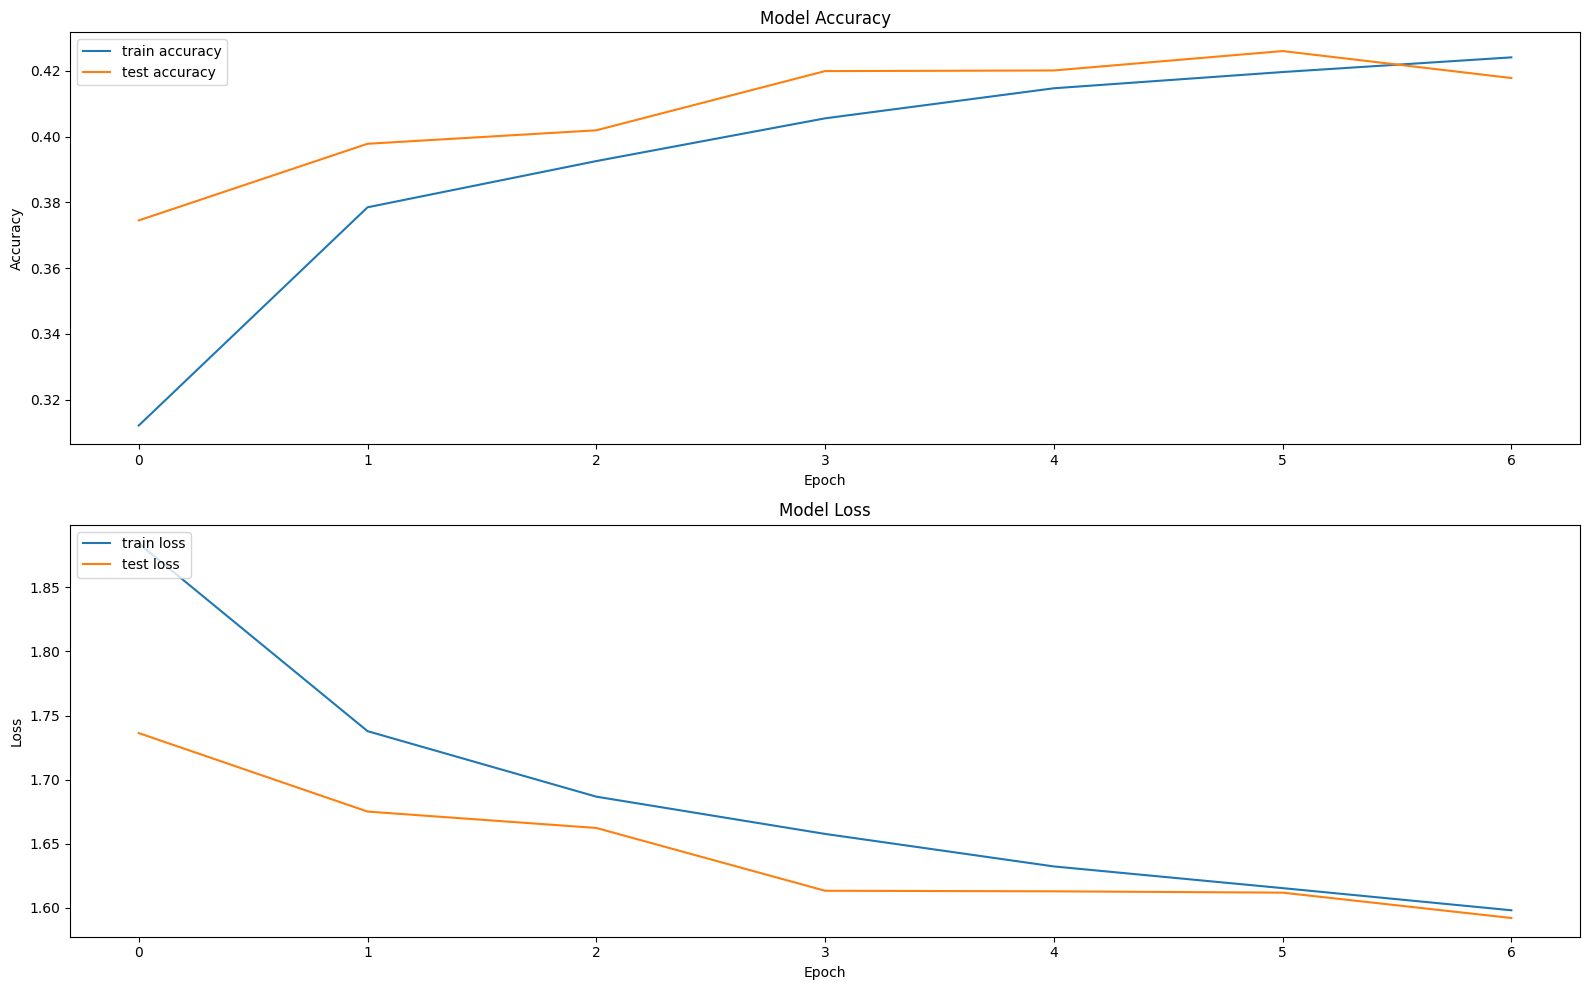

In [18]:
plot_training_history(history)

In [19]:
show_test_accuracy(test_acc)

Test accuracy: 0.41780000925064087


We still pickup the `epoches` to 14.

#### The result of the test not change a lot! Also get worse!

Then we can try other variables to improve the result of our model.

### Now we add the `bastch_size`

In [20]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2348 - loss: 2.0500 - val_accuracy: 0.3293 - val_loss: 1.8417
Epoch 2/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3435 - loss: 1.8137 - val_accuracy: 0.3549 - val_loss: 1.7835
Epoch 3/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3529 - loss: 1.7902 - val_accuracy: 0.3544 - val_loss: 1.7798
Epoch 4/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3659 - loss: 1.7562 - val_accuracy: 0.3604 - val_loss: 1.7651
Epoch 5/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3700 - loss: 1.7413 - val_accuracy: 0.3627 - val_loss: 1.7368
Epoch 6/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3772 - loss: 1.7289 - val_accuracy: 0.3750 - val_loss: 1.7333
Epoch 7/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3776 - loss: 1.7307 - val_accuracy: 0.3794 - val_loss: 1.7068
Epoch 8/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3856 - loss: 1.7082 - val_accuracy: 0.

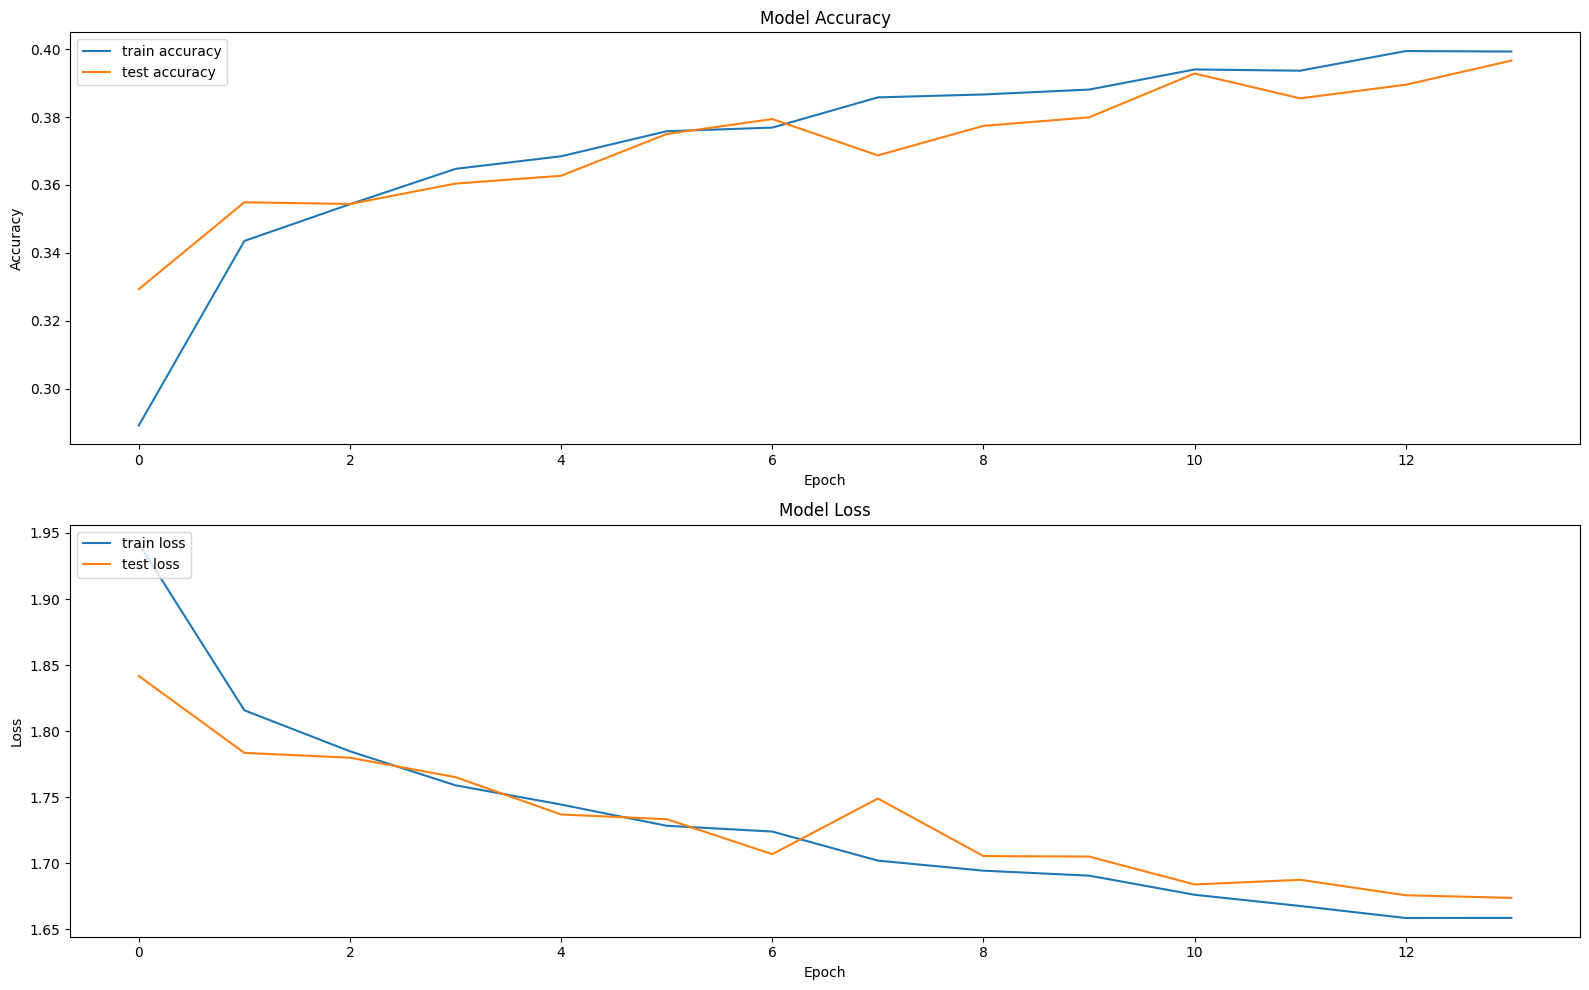

In [21]:
plot_training_history(history)

In [22]:
show_test_accuracy(test_acc)

Test accuracy: 0.39660000801086426


#### The result of the test truly increases! Then we can find it may occur overfitting at `epoches 9` then we change the epoches


In [23]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2441 - loss: 2.0413 - val_accuracy: 0.3495 - val_loss: 1.7890
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3609 - loss: 1.7721 - val_accuracy: 0.3690 - val_loss: 1.7614
Epoch 3/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3857 - loss: 1.7281 - val_accuracy: 0.3922 - val_loss: 1.6885
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3986 - loss: 1.6812 - val_accuracy: 0.4060 - val_loss: 1.6602
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4071 - loss: 1.6640 - val_accuracy: 0.3605 - val_loss: 1.7903
Epoch 6/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4052 - loss: 1.6538 - val_accuracy: 0.4190 - val_loss: 1.6239
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4094 - loss: 1.6290 - val_accuracy: 0.4189 - val_loss: 1.6246
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4145 - loss: 1.6228 - val_accuracy: 0.4214 - v

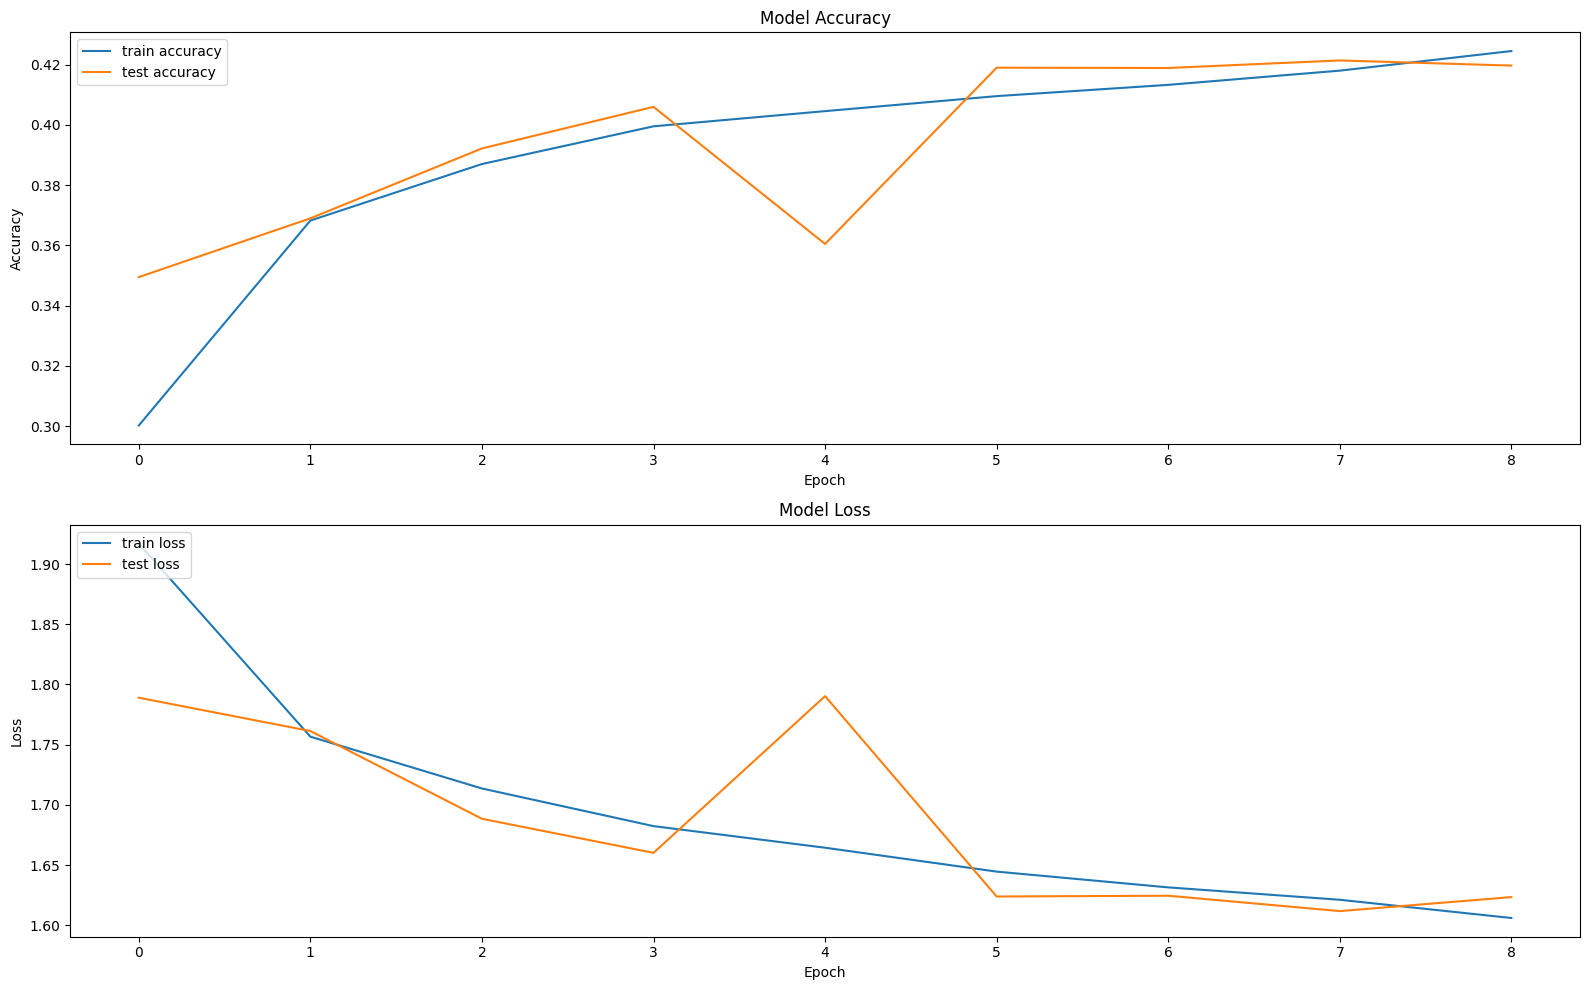

In [24]:
plot_training_history(history)

In [25]:
show_test_accuracy(test_acc)

Test accuracy: 0.4196999967098236


#### However, the accuracy decrease, then we still set our `epoches` to 14. Now we try to increase the speed of training, we set the `batch_size` larger.

In [26]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2097 - loss: 2.1274 - val_accuracy: 0.3210 - val_loss: 1.8711
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3319 - loss: 1.8521 - val_accuracy: 0.3481 - val_loss: 1.8215
Epoch 3/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3584 - loss: 1.7929 - val_accuracy: 0.3670 - val_loss: 1.7729
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3712 - loss: 1.7493 - val_accuracy: 0.3769 - val_loss: 1.7308
Epoch 5/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3827 - loss: 1.7182 - val_accuracy: 0.3906 - val_loss: 1.6853
Epoch 6/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4006 - loss: 1.6805 - val_accuracy: 0.3831 - val_loss: 1.7096
Epoch 7/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3958 - loss: 1.6802 - val_accuracy: 0.3865 - val_loss: 1.6945
Epoch 8/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4119 - loss: 1.6476 - val_accuracy: 0.4161 - 

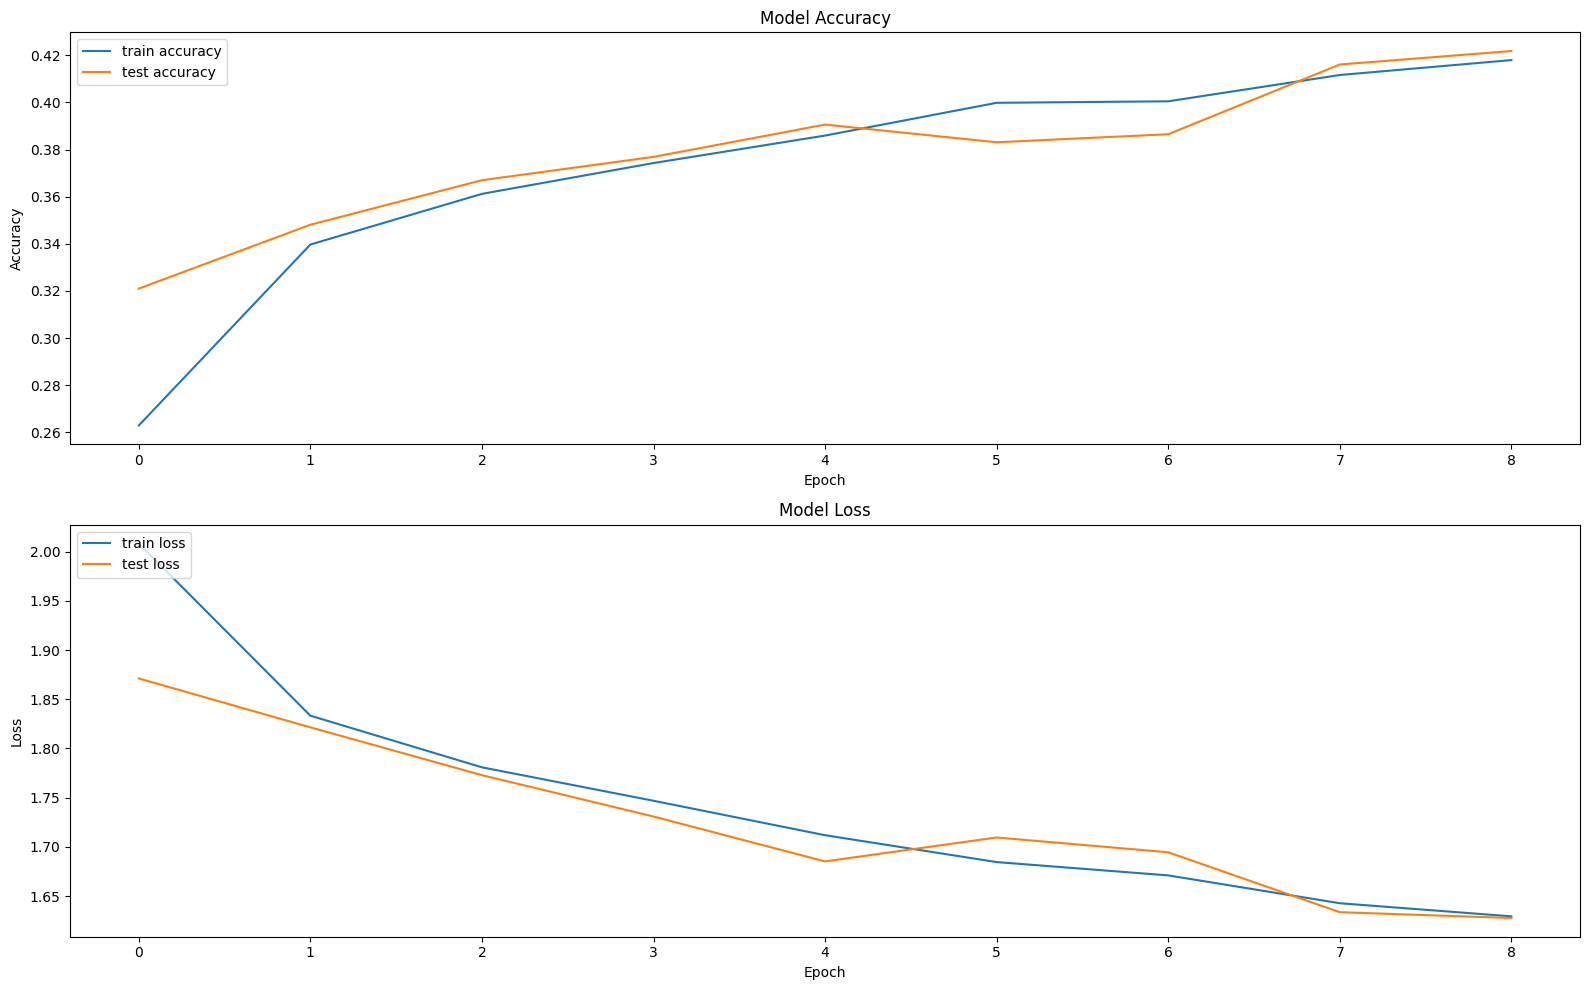

In [27]:
plot_training_history(history)

In [28]:
show_test_accuracy(test_acc)

Test accuracy: 0.42179998755455017


#### We find that when we adjust our `batch_size` larger, we can also increase the result of our model!

### Test accuracy: 0.4408000111579895




Then we can try another test to change our `optimizer`.

In [29]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [30]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1307 - loss: 2.2767 - val_accuracy: 0.1666 - val_loss: 2.1339
Epoch 2/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1735 - loss: 2.1373 - val_accuracy: 0.2212 - val_loss: 2.0610
Epoch 3/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2255 - loss: 2.0614 - val_accuracy: 0.2252 - val_loss: 2.0449
Epoch 4/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2454 - loss: 2.0072 - val_accuracy: 0.1609 - val_loss: 2.4071
Epoch 5/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2765 - loss: 1.9744 - val_accuracy: 0.2968 - val_loss: 1.9086
Epoch 6/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2950 - loss: 1.9150 - val_accuracy: 0.3216 - val_loss: 1.8904
Epoch 7/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3092 - loss: 1.8896 - val_accuracy: 0.3064 - val_loss: 1.8925
Epoch 8/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3215 - loss: 1.8715 - val_accuracy: 0

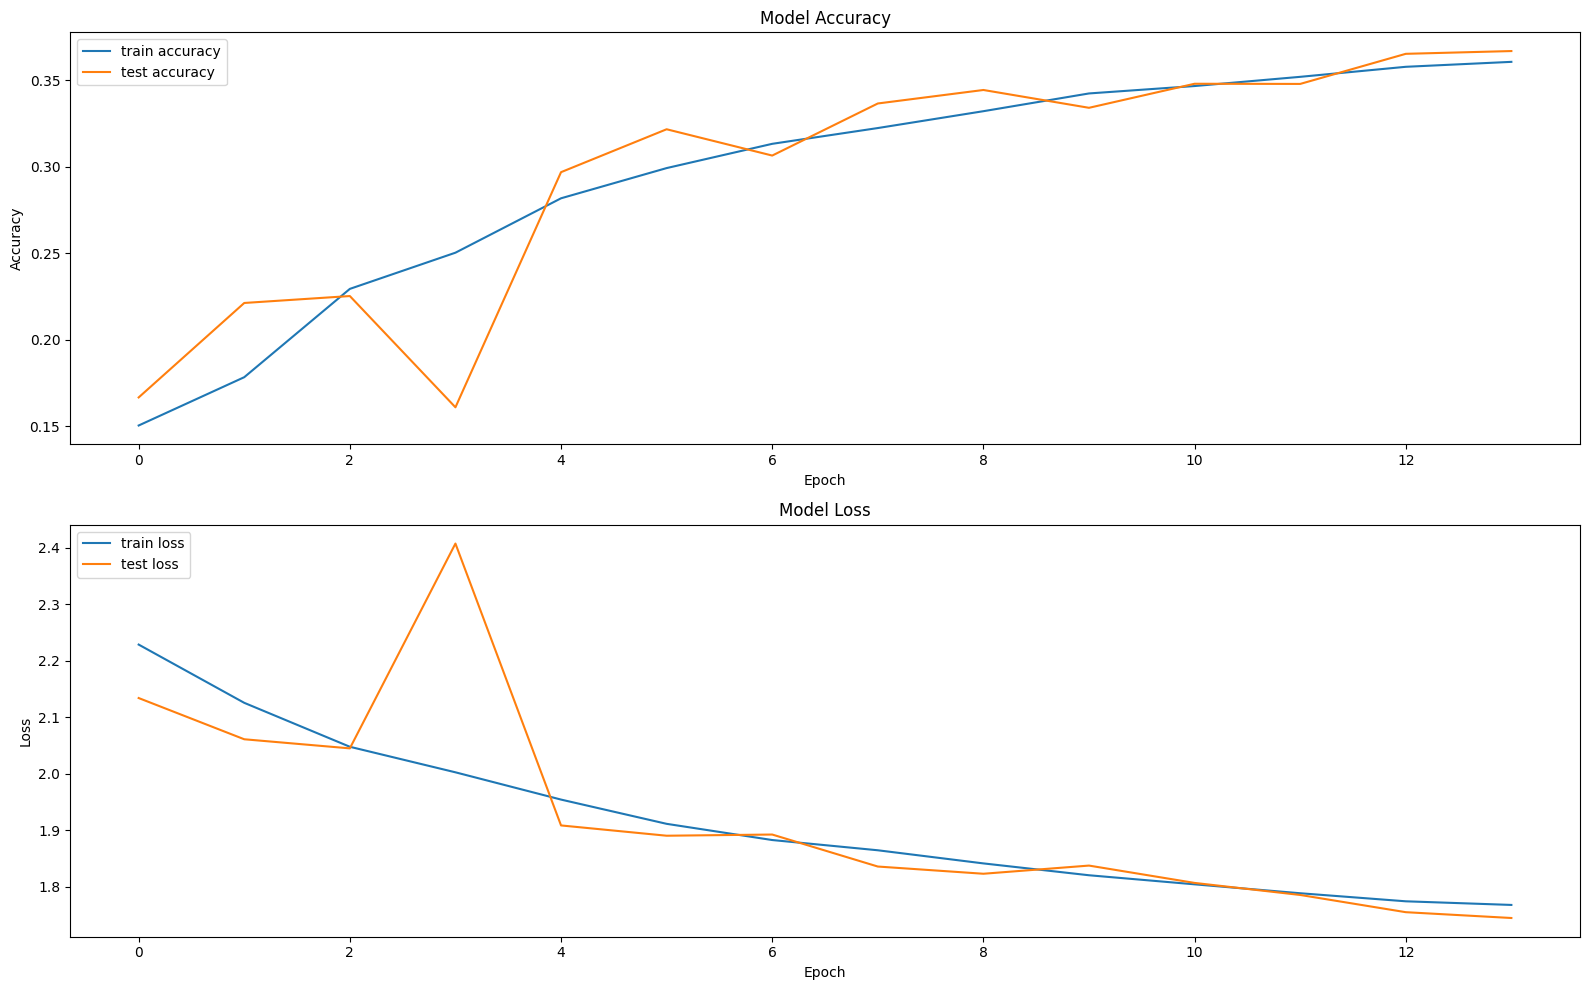

In [31]:
plot_training_history(history)

In [34]:
show_test_accuracy(test_acc)

Test accuracy: 0.3668000102043152


### Test accuracy: 0.4668000042438507

And we found that the `val_loss` and `loss` more smoothly.

## My gained knowledge

I have tested a lot of experiment to improve the model; however, all of the results still surround to about forty percent accuracy. 

#### Below are the experiments I have conducted:
* `epoches: from 20 -> 14 -> 9 -> 14`.
* `batch_size: from 100 -> 500`.
* `optimizer: adam and rmsprop`.

Even though I designed a lot of experiments, the accuracy did not increase significantly. I have considered the reasons, and here are my conclusions. 

First, our Deep Neural-Network model was limited by the size of the CIFAR-10 dataset, which consisted of up to 50000 training_data and up to 10000 testing_data. The larger datasets made it difficult for the DNN model to capture all the necessary values during training, which resulted in less accuracy even when we changed several variables. 

Second, given the large amount of data, I could have tried to drop out the data that affected the results. However, I thought that we might be able to choose the Convolutional Neural-Network instead because it was more suitable for dropping out the worse neural in our model.

In conclusion, I am excited to have the opportunity to improve my deep-learning skills with this dataset and to review what I have learned before.

### Reference

* [Day 20 ~ AI從入門到放棄 - 新的資料集](https://ithelp.ithome.com.tw/articles/10248873)
* [簡單使用keras 架構深度學習神經網路 — 以cifar10為例](https://medium.com/@a227799770055/%E7%B0%A1%E5%96%AE%E4%BD%BF%E7%94%A8keras-%E6%9E%B6%E6%A7%8B%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E4%BB%A5cifar10%E7%82%BA%E4%BE%8B-b8921ca239cf)